In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [28]:
X = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [62]:
train_X,test_X,train_Y,test_Y = train_test_split(X[['ENGINESIZE']],X[['CO2EMISSIONS']],test_size=0.2)

In [63]:
poly = PolynomialFeatures(degree=3)

train_x_poly = poly.fit_transform(train_X)

In [64]:
clf = linear_model.LinearRegression()
train_Y_ = clf.fit(train_x_poly,train_Y)
print(clf.coef_)

[[ 0.         26.48039571  5.18513536 -0.55084717]]


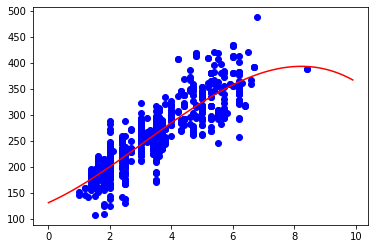

In [69]:
plt.scatter(train_X[['ENGINESIZE']],train_Y[['CO2EMISSIONS']],color='blue')
XX = np.arange(0.0, 10.0, 0.1)
YY = clf.intercept_[0] + clf.coef_[0][1]*XX +clf.coef_[0][2]*(XX**2) +clf.coef_[0][3]*(XX**3)
plt.plot(XX,YY,color='r')

In [70]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_X)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_Y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_Y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_Y) )

Mean absolute error: 23.48
Residual sum of squares (MSE): 893.60
R2-score: 0.72
